# Introduction
## [Github Link](https://github.com/bubby131/DSCI235final)
For this project, I took a look at trafic data. This data is a subset of the Maryland County Traffic Violation Dataset and can be found [here](https://www.kaggle.com/datasets/shubamsumbria/traffic-violations-dataset). There are 15 features in this dataset but for this project I will be focusing on race, age, gender, stop time, if arrested, and if a search was conducted. The idea is that ther is three aspects of a traffic stop im looking at so I want to examine how each feature of a driver related to the three features of a traffic stop.

To begin with I import the packages that I will use through out this notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

After grabbing packages needed, I will now load in the data set and extract the features that will be examined in this project. Note, there are 52966 traffic stops that are being examined for this project.

In [2]:
TrafficData = pd.read_csv('https://raw.githubusercontent.com/bubby131/DSCI235final/main/traffic_violaions.csv', index_col=0) 
TrafficData = TrafficData.drop(TrafficData.columns[[0, 1,3,6,7,9,13,10]], axis=1)
TrafficData.head()

,driver_gender,driver_age,driver_race,search_conducted,is_arrested,stop_duration
stop_date,,,,,,
1/2/2005,M,20.0,White,False,False,0-15 Min
1/18/2005,M,40.0,White,False,False,0-15 Min
1/23/2005,M,33.0,White,False,False,0-15 Min
2/20/2005,M,19.0,White,False,True,16-30 Min
3/14/2005,F,21.0,White,False,False,0-15 Min


# Examining Age

The first analysis preformed will be age. I want to see the count of each age for the three traffic violations. The data for age is continious so for if arrested and if searched conducted a line plot of summed true values will be able to effectively show which age groups appear the most. For stop duration, the data is categorical so the first idea was to do three line graphs but because the difference in frequency, the scalling would make it difficult to see the less common category 30+ minutes. Instead, I will do a box and whisker plot. These plots can tell us a lot about the data but for the purposes of this project I will only be using it to quickly and concisely detect any skews in age for the three groups.

Note: some values of traffic stops werent recorded and considered 'NaN' so they will be ignored.

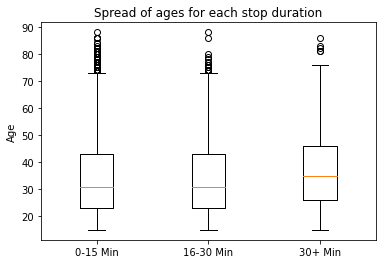

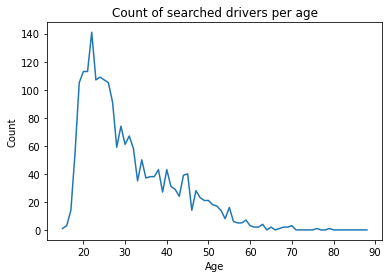

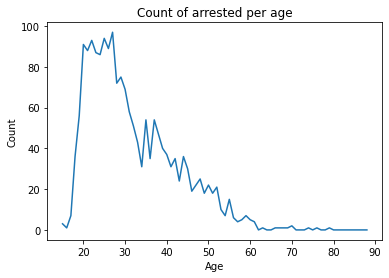

In [3]:
# create variable temp to hold the name of the three categories of stop duration
Temp = TrafficData['stop_duration'].unique()

# XValues will be used to hold all the age information per traffic stop. Using temp we can 
# have an index that lets us select which age data we want to see per category which will
# make the box plot much easier to make
XValues = []
XValues.append(TrafficData['driver_age'].values[TrafficData['stop_duration'] == Temp[0]])
XValues.append(TrafficData['driver_age'].values[TrafficData['stop_duration'] == Temp[1]])
XValues.append(TrafficData['driver_age'].values[TrafficData['stop_duration'] == Temp[2]])

# As mentioned above, there are some NaN values so this just ignores them
XValues[0] = XValues[0][~np.isnan(XValues[0])]
XValues[1] = XValues[1][~np.isnan(XValues[1])]
XValues[2] = XValues[2][~np.isnan(XValues[2])]


# Create box blot with the data but note that the X will be 0 , 1 , 2 based off the stop duration
plt.boxplot(XValues)
#We technically have 4 categories if we include NaN but since we dropped that data we can ignore the label
#Line bellow changes the value of X ticks from numbers to the category name
plt.xticks(range(1, len(Temp) ), Temp[:-1])
plt.ylabel('Age')
plt.title('Spread of ages for each stop duration')
plt.show()


# Bellow im creating a copy of the data frame so I can edit it without worrying about reseting the main
# data 
# The new ForPlotting data frame will have an index of each age and a value of the sum of count for search
# conducted allowing for easier plotting
ForPlotting = DataSet = pd.DataFrame([])
ForPlotting['driver_age'] = TrafficData['driver_age']
ForPlotting['search_conducted'] = TrafficData['search_conducted']
ForPlotting = ForPlotting.groupby('driver_age')['search_conducted'].sum()
plt.plot(ForPlotting.index , ForPlotting, )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of searched drivers per age')
plt.show()

# Bellow im creating a copy of the data frame so I can edit it without worrying about reseting the main
# data 
# The new ForPlotting data frame will have an index of each age and a value of the sum of count for is 
# arrest of that age allowing for easier plotting
TemperFi = DataSet = pd.DataFrame([])
TemperFi['driver_age'] = TrafficData['driver_age']
TemperFi['is_arrested'] = TrafficData['is_arrested']
TemperFi = TemperFi.groupby('driver_age')['is_arrested'].sum()
plt.plot(TemperFi.index , TemperFi)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of arrested per age')
plt.show()

**Analysis**

To start off with, lets take a look at the box and whisker plot. The biggest take away is that the box shape is towards the bottom for each of the three stop duration times. This indicates that the number of people per age for each stop were heavily skewed towards the younger ages meaning the younger drivers were more likely to be the target of all stops. The fact that all three graphs have the box shape so low indicates that as a whole, younger drivers made up most of the stops. Note, if the box plot was in the middle this would suggest that the all ages are searched for that category equally.

The next graph ploted was count of searched drivers per age. For this graph, not the strong peak at mid 20's and the general left skew. All this shows that for searches conducted were most common in younger drivers. Whats also interesting is the strong peak at around 24 years old meaning that age group was stopped much more than any other. Personally, I wouldve thought i'd be 21.

Lastly, age count for arrested traffic stops were analyized. Again, the left skew is clear indicating that younger drivers were most of the arrest made for traffic violations. What's interesting about this graph compared the the searched graph is that there isnt a distict peak of one age group being most of the counts but rather a platow of range of ages being the most commonly arrested.


# Driver Gender

We've seen that certain ages are represented more for each traffic stop feature, but what about gender? For the code and graphs bellow, I will be examing counts of each gender for the traffic stops to see if one is more frequent. Note, I think that the gender data refers to sex of the driver.

Since we have two distinct categories of gender in the data set I will be using a bar graph to show the counts per gender side by side. The only exception is he first graph which will be a line graph. The line graph will be category of stop duration for x, count of stops for that category for y, and color will be gender.

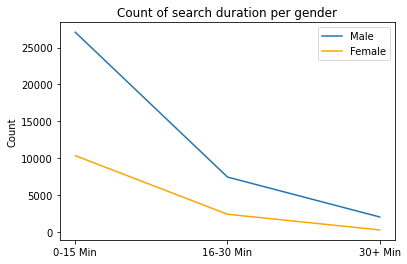

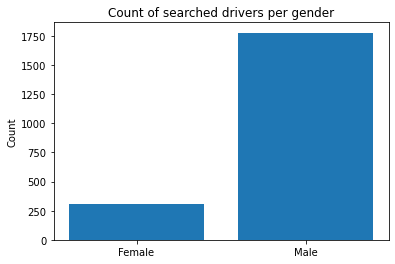

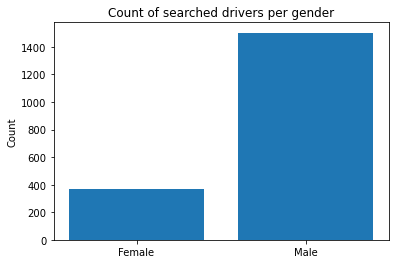

In [4]:
# same thing as before with temp being the three category names 
Temp = TrafficData['stop_duration'].unique()
XValues = []
ActualValues = []
# Split data by the traffic duration time. Note, we dont need to drop NaN values like before since there are none
# we can confirm this with out graph. If there were NaN then nothing would appear
XValues.append(TrafficData['driver_gender'].values[TrafficData['stop_duration'] == Temp[0]])
XValues.append(TrafficData['driver_gender'].values[TrafficData['stop_duration'] == Temp[1]])
XValues.append(TrafficData['driver_gender'].values[TrafficData['stop_duration'] == Temp[2]])

# Next, take that data and make it a 3,2 by finding the sum and appending the [ male count, female count]
# to the over all ActualValues list
ActualValues.append([np.sum([XValues[0] == 'M']),np.sum([XValues[0] == 'F'])])
ActualValues.append([np.sum([XValues[1] == 'M']),np.sum([XValues[1] == 'F'])])
ActualValues.append([np.sum([XValues[2] == 'M']),np.sum([XValues[2] == 'F'])])
# Convert nested list to numpy array since I like indexing with this much more
ActualValues = np.array(ActualValues)
plt.plot(range(1,4),ActualValues[:,0] ,  label = 'Male')
plt.plot(range(1,4),ActualValues[:,1] ,  label = 'Female' , color = 'Orange')
# same thing as before, ignore the NaN values
plt.xticks(range(1, len(Temp) ), Temp[:-1])
plt.legend()
plt.ylabel('Count')
plt.title('Count of search duration per gender')
plt.show()


# Same idea of duplicating the main data frame so I can alter it.
# For this I will be applying sum.
Temp = TrafficData['driver_gender'].unique()
ForPlotting = DataSet = pd.DataFrame([])
ForPlotting['driver_gender'] = TrafficData['driver_gender']
ForPlotting['search_conducted'] = TrafficData['search_conducted']
ForPlotting = ForPlotting.groupby('driver_gender')['search_conducted'].sum()
plt.bar([0,1] , ForPlotting.values)
plt.ylabel('Count')
plt.title('Count of searched drivers per gender')
plt.xticks([0,1], ['Female','Male'])
plt.show()


Temp = TrafficData['driver_gender'].unique()
ForPlotting = DataSet = pd.DataFrame([])
ForPlotting['driver_gender'] = TrafficData['driver_gender']
ForPlotting['is_arrested'] = TrafficData['is_arrested']
ForPlotting = ForPlotting.groupby('driver_gender')['is_arrested'].sum()
plt.bar([0,1] , ForPlotting.values)
plt.ylabel('Count')
plt.title('Count of searched drivers per gender')
plt.xticks([0,1], ['Female','Male'])
plt.show()

**Analysis**

For the first graph (line plot), we can see overall there are much more 0-15 minute stops and few 30+ minute stops. Whats most interesting, is that in all three categories of search duration men are twice as common as women. 

For both search conducted and if arrested, men are much more frequent. 

# Driver Race

The last driver feature to be explored is race. Using a line plot then two bars, I will exmine the counts of each race defined in the data set in terms of the three traffic stop features. Note, for the first line plot, the graph on the right is a log scale and the left is standard scale. Since the white category count was larger than the rest it squished the plots and made it hard to see general shape so log plot is also given. 

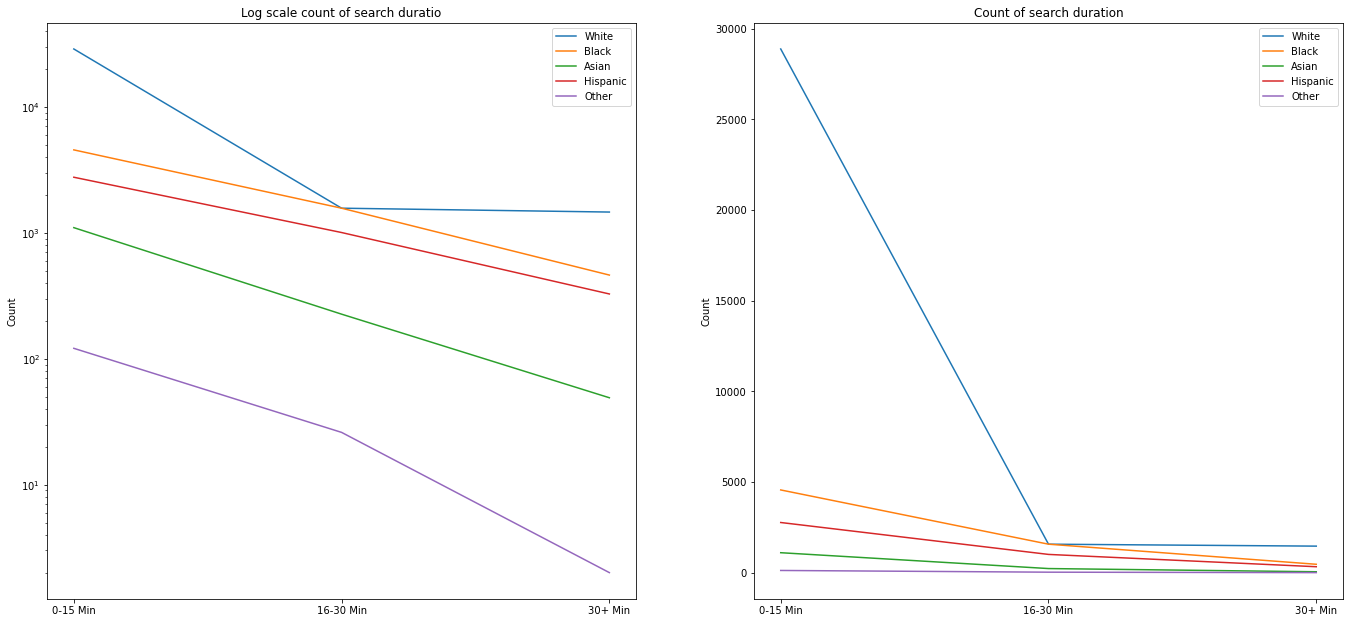

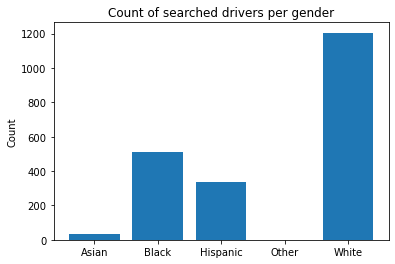

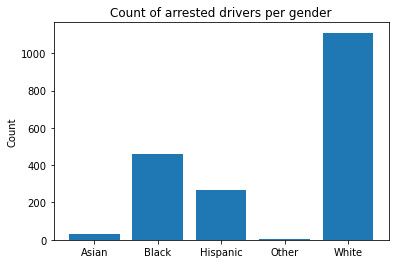

In [5]:
# Temp keeps track of each of three distinct category names for stop duration
Temp = TrafficData['stop_duration'].unique()
# AnotherTemp keeps track of the name of the races examined in the data set
AnotherTemp = TrafficData['driver_race'].unique()
#deletes value in index 2, this is the NaN value so we ignore that data
AnotherTemp = np.delete(AnotherTemp,3)
XValues = []
ActualValues = []
XValues.append(TrafficData['driver_race'].values[TrafficData['stop_duration'] == Temp[0]])
XValues.append(TrafficData['driver_race'].values[TrafficData['stop_duration'] == Temp[1]])
XValues.append(TrafficData['driver_race'].values[TrafficData['stop_duration'] == Temp[2]])

# append a list to ActualValues where each index is count of traffic stop for a specific duartion for each race
ActualValues.append([np.sum([XValues[0] == AnotherTemp[0]]),np.sum([XValues[0] == AnotherTemp[1]]),np.sum([XValues[0] == AnotherTemp[2]]),np.sum([XValues[0] == AnotherTemp[3]]),np.sum([XValues[0] == AnotherTemp[4]])])
ActualValues.append([np.sum([XValues[1] == AnotherTemp[1]]),np.sum([XValues[1] == AnotherTemp[1]]),np.sum([XValues[1] == AnotherTemp[2]]),np.sum([XValues[1] == AnotherTemp[3]]),np.sum([XValues[1] == AnotherTemp[4]])])
ActualValues.append([np.sum([XValues[2] == AnotherTemp[0]]),np.sum([XValues[2] == AnotherTemp[1]]),np.sum([XValues[2] == AnotherTemp[2]]),np.sum([XValues[2] == AnotherTemp[3]]),np.sum([XValues[2] == AnotherTemp[4]])])
ActualValues = np.array(ActualValues)
plt.subplot(1, 2, 1)
plt.plot(range(1,4),ActualValues[:,0] ,  label = AnotherTemp[0])
plt.plot(range(1,4),ActualValues[:,1] ,  label = AnotherTemp[1])
plt.plot(range(1,4),ActualValues[:,2] ,  label = AnotherTemp[2])
plt.plot(range(1,4),ActualValues[:,3] ,  label = AnotherTemp[3])
plt.plot(range(1,4),ActualValues[:,4] ,  label = AnotherTemp[4])
plt.xticks(range(1, len(Temp) ), Temp[:-1])
plt.legend()
plt.yscale('log')
plt.ylabel('Count')
plt.title('Log scale count of search duratio')
plt.subplot(1, 2, 2)
plt.plot(range(1,4),ActualValues[:,0] ,  label = AnotherTemp[0])
plt.plot(range(1,4),ActualValues[:,1] ,  label = AnotherTemp[1])
plt.plot(range(1,4),ActualValues[:,2] ,  label = AnotherTemp[2])
plt.plot(range(1,4),ActualValues[:,3] ,  label = AnotherTemp[3])
plt.plot(range(1,4),ActualValues[:,4] ,  label = AnotherTemp[4])
plt.xticks(range(1, len(Temp) ), Temp[:-1])
plt.legend()
plt.ylabel('Count')
plt.title('Count of search duration')
plt.subplots_adjust(left=5 , right = 8, top = 2 , bottom = 0)
plt.show()

Temp = TrafficData['driver_race'].unique()
TemperFi = DataSet = pd.DataFrame([])
TemperFi['driver_race'] = TrafficData['driver_race']
TemperFi['search_conducted'] = TrafficData['search_conducted']
TemperFi = TemperFi.groupby('driver_race')['search_conducted'].sum()
plt.bar(range(len(AnotherTemp)) , TemperFi.values)
plt.ylabel('Count')
plt.title('Count of searched drivers per gender')
plt.xticks(range(len(AnotherTemp)), TemperFi.index)
plt.show()

Temp = TrafficData['driver_race'].unique()
TemperFi = DataSet = pd.DataFrame([])
TemperFi['driver_race'] = TrafficData['driver_race']
TemperFi['is_arrested'] = TrafficData['is_arrested']
TemperFi = TemperFi.groupby('driver_race')['is_arrested'].sum()
plt.bar(range(len(AnotherTemp)) , TemperFi.values)
plt.ylabel('Count')
plt.title('Count of arrested drivers per gender')
plt.xticks(range(len(AnotherTemp)), TemperFi.index)
plt.show()

**Analysis**

For the line plot, we see that white accounts for the most traffic stops in Maryland. Log was scaled was used since the total amount of white counts for 0-15 minutes was about 6x the second highest race. For 16-30 and 30+, we see that the count of white is much more similar to the other races.

For the other two bar graphs, white counts is the higher than any other race. Interestingly, while white was 6x higher than any other race for 0-15 stop duration, its only twice as large at most as the second highest race count for count of searched and count of arrested.

# Conclusion

Through out the three driver features, we can see through the graphs that certain aspects of a driver are more common in the traffic violation data. For example, younger drivers, men, and white are signficantly the most common. It is important to note for race the count could come from overall population of each race. For example white is most common for the reported race because it is the most common race in Maryland. For age and gender, the population distribution is fairly uniform so the skews we see area fairly signficant.